In [109]:
#Parse outputfile
%config InlineBackend.figure_format = 'retina'


"""
Format:

planetnumber    period_days     T0_days sqrt(e)cos(w)   sqrt(e)sin(w)   inc_deg Omega_deg       Mass_jupiter    Rp/Rs   
planetnumber    period_days     T0_days sqrt(e)cos(w)   sqrt(e)sin(w)   inc_deg Omega_deg       Mass_jupiter    Rp/Rs   
planetnumber    period_days     T0_days sqrt(e)cos(w)   sqrt(e)sin(w)   inc_deg Omega_deg       Mass_jupiter    Rp/Rs   
mstar
rstar
c1
c2
dilution
; chi^2, chain#, generation#


Notes:
t_epoch = 2020.0 
Planet masses are in Jupiter Masses, Msun/Mjup = 1.04737701464237e3
Stellar masses are in Solar Masses
G = 2.9591220363e-4 in AU-day units
Everything else should be self explanatory hopefully
"""

'\nFormat:\n\nplanetnumber    period_days     T0_days sqrt(e)cos(w)   sqrt(e)sin(w)   inc_deg Omega_deg       Mass_jupiter    Rp/Rs   \nplanetnumber    period_days     T0_days sqrt(e)cos(w)   sqrt(e)sin(w)   inc_deg Omega_deg       Mass_jupiter    Rp/Rs   \nplanetnumber    period_days     T0_days sqrt(e)cos(w)   sqrt(e)sin(w)   inc_deg Omega_deg       Mass_jupiter    Rp/Rs   \nmstar\nrstar\nc1\nc2\ndilution\n; chi^2, chain#, generation#\n\n\nNotes:\nt_epoch = 2020.0 \nPlanet masses are in Jupiter Masses, Msun/Mjup = 1.04737701464237e3\nStellar masses are in Solar Masses\nG = 2.9591220363e-4 in AU-day units\nEverything else should be self explanatory hopefully\n'

In [ ]:
import ktwo19.nbody
reload(ktwo19.nbody)
ktwo19.nbody.run_simulation(0)

In [151]:
sa = rebound.SimulationArchive("archive.bin")
#sim = sa.getSimulation(4000)
%pylab inline
nsamp = 10000
times = np.linspace(3000,200000,nsamp)
df = []
for sim in sa.getSimulations(times):
    d = {}
    d['pomega1'] = sim.particles[1].pomega
    d['pomega2'] = sim.particles[2].pomega
    d['e1'] = sim.particles[1].e
    d['e2'] = sim.particles[2].e
    d['Omega1'] = sim.particles[1].Omega
    d['Omega2'] = sim.particles[2].Omega
    d['omega1'] = sim.particles[1].omega
    d['omega2'] = sim.particles[2].omega
    d['inc1'] = sim.particles[1].inc
    d['inc2'] = sim.particles[2].inc
    d['lamb1'] = sim.particles[1].l
    d['lamb2'] = sim.particles[2].l
    d['n1'] = sim.particles[1].n
    d['n2'] = sim.particles[2].n
    
    df.append(d)
df = pd.DataFrame(df)
df['time'] = times

Populating the interactive namespace from numpy and matplotlib


Populating the interactive namespace from numpy and matplotlib


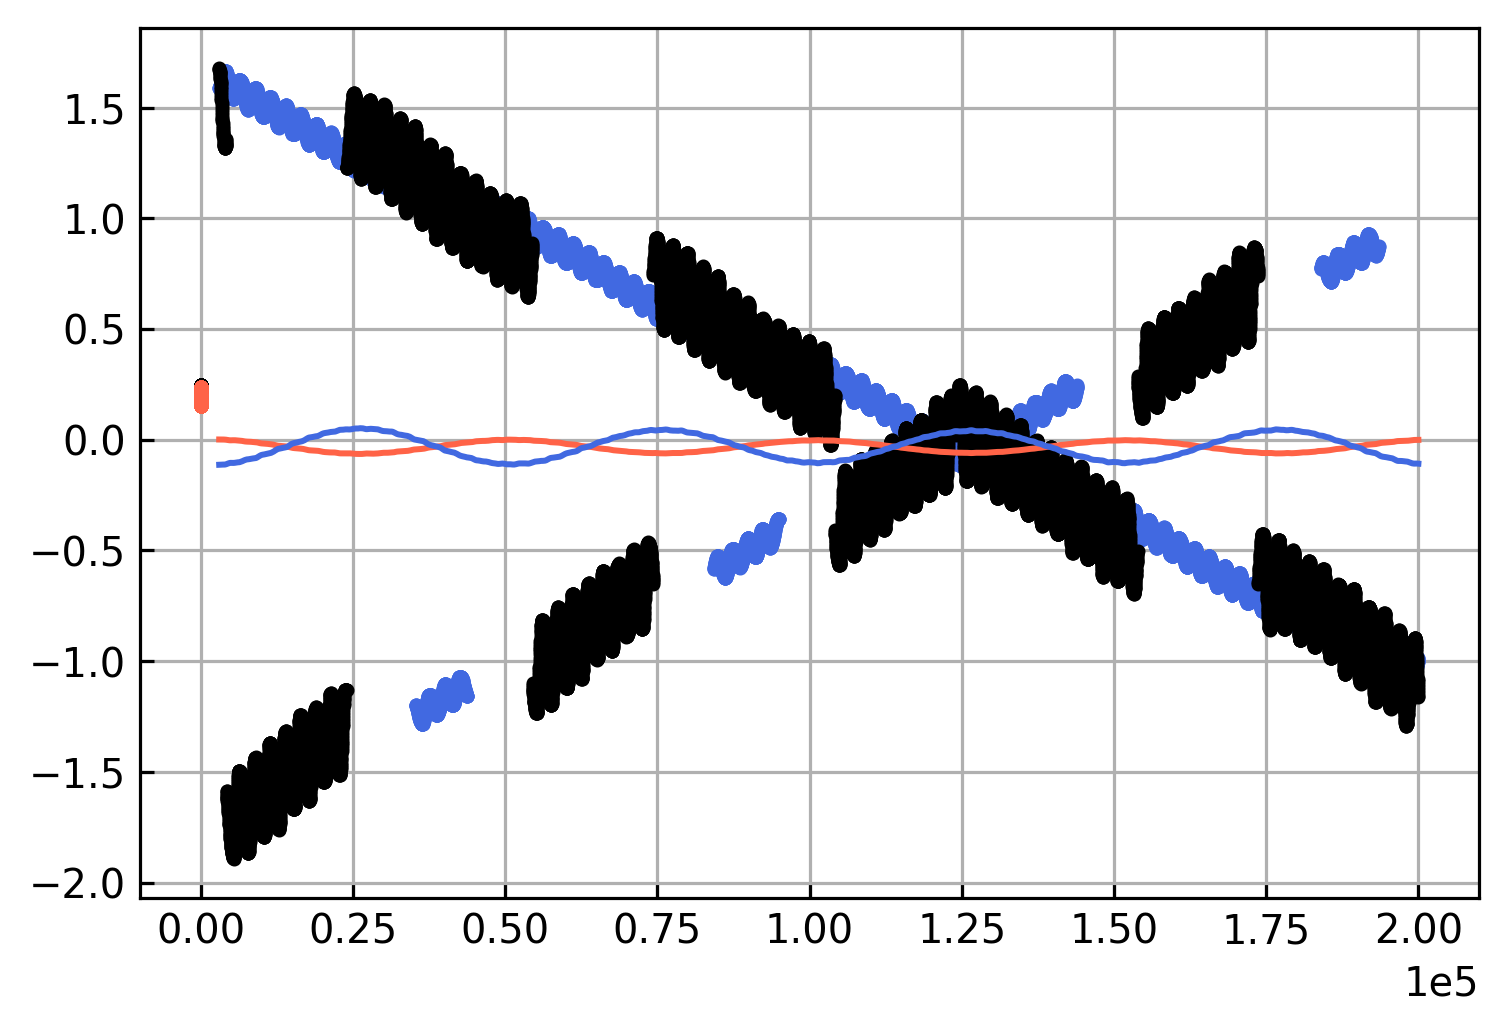

In [152]:
%pylab osx

df['dpomega'] = df.pomega2 - df.pomega1
df['dpomega'] = np.arctan2(np.sin(df['dpomega']), np.cos(df['dpomega']))
plot(df['dpomega'],df.e1,'.')
plot(df['dpomega'],df.e2,'.')
#plot(df['time'],df['dpomega'] )
plot(df['time'],df.pomega1,'.')
plot(df['time'],df.pomega2,'.')

plot(df['time'],df['Omega1'] )
plot(df['time'],df['Omega2'] )

#plot(df['time'],df['e1'] )
#plot(df['time'],df['e2'] )
grid()

Populating the interactive namespace from numpy and matplotlib


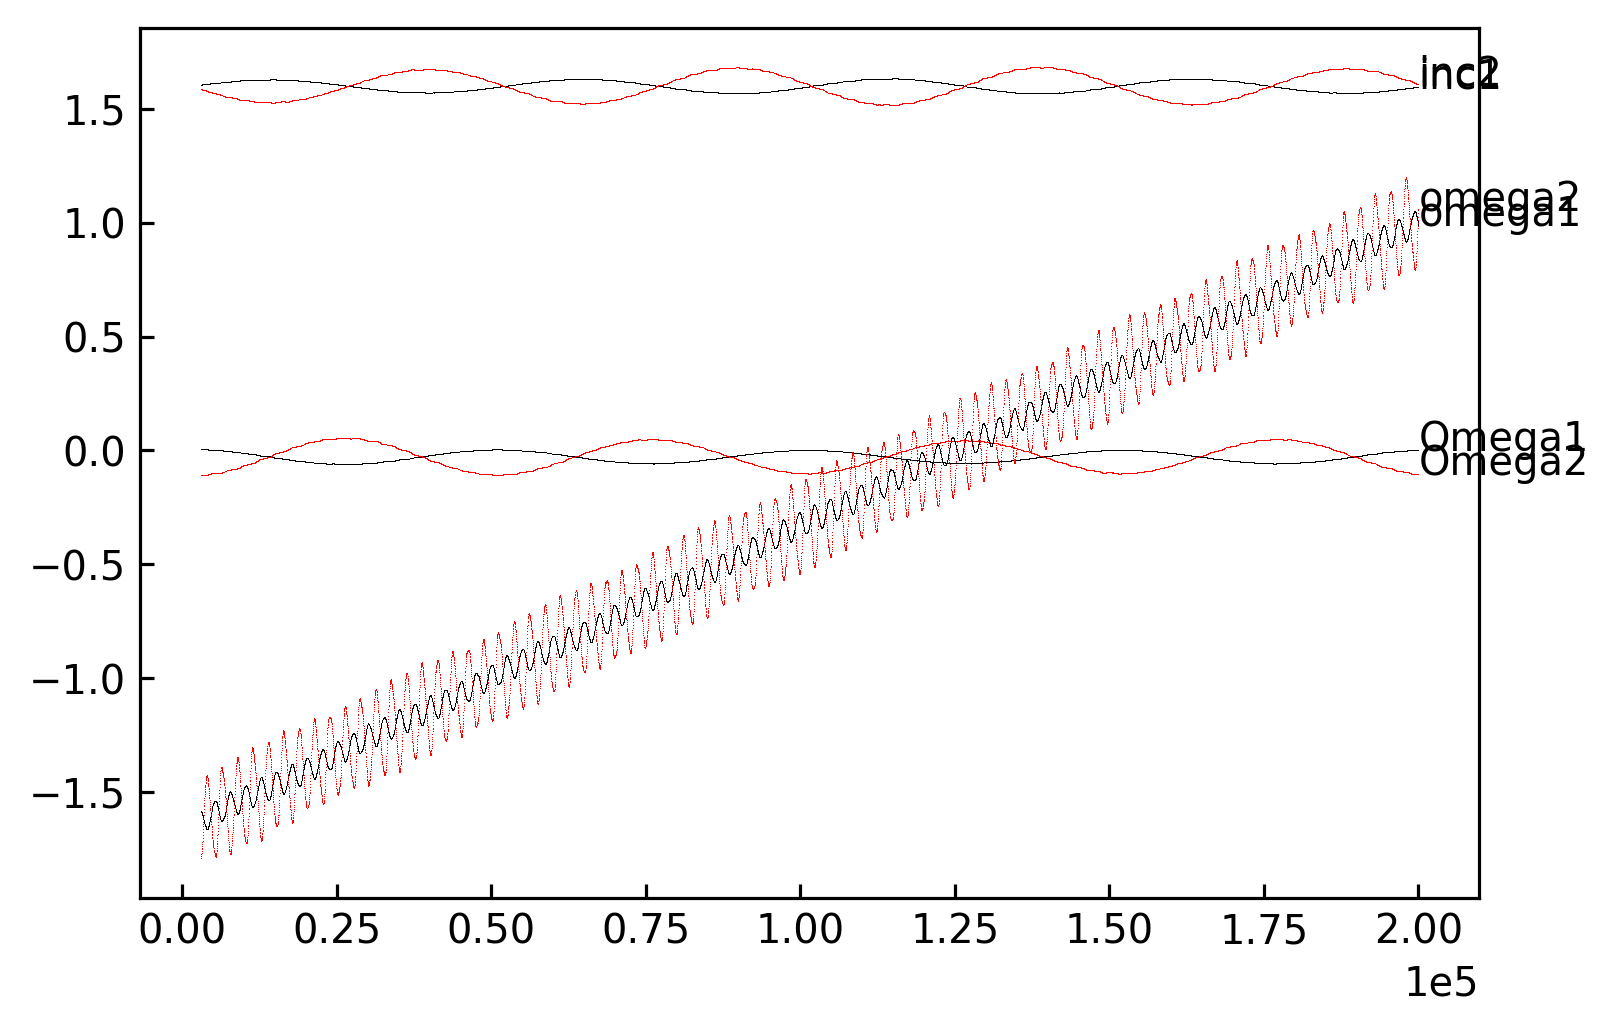

In [155]:
%pylab osx
#plot(df['time'],df['dpomega'] )
#plot(df['time'],df.pomega1,',k')
#plot(df['time'],df.pomega2,',r')
plot(df['time'],df['Omega1'],',k' )
plot(df['time'],df['Omega2'],',r' )
plot(df['time'],df['omega1'],',k' )
plot(df['time'],df['omega2'],',r' )
plot(df['time'],df['inc1'],',k' )
plot(df['time'],df['inc2'],',r' )
#plot(df['time'],,',r' )

lrow = df.iloc[-1]
for key in 'Omega1 Omega2 omega1 omega2 inc1 inc2'.split():
    text(lrow.time, lrow[key],key)


(0, 0.3)

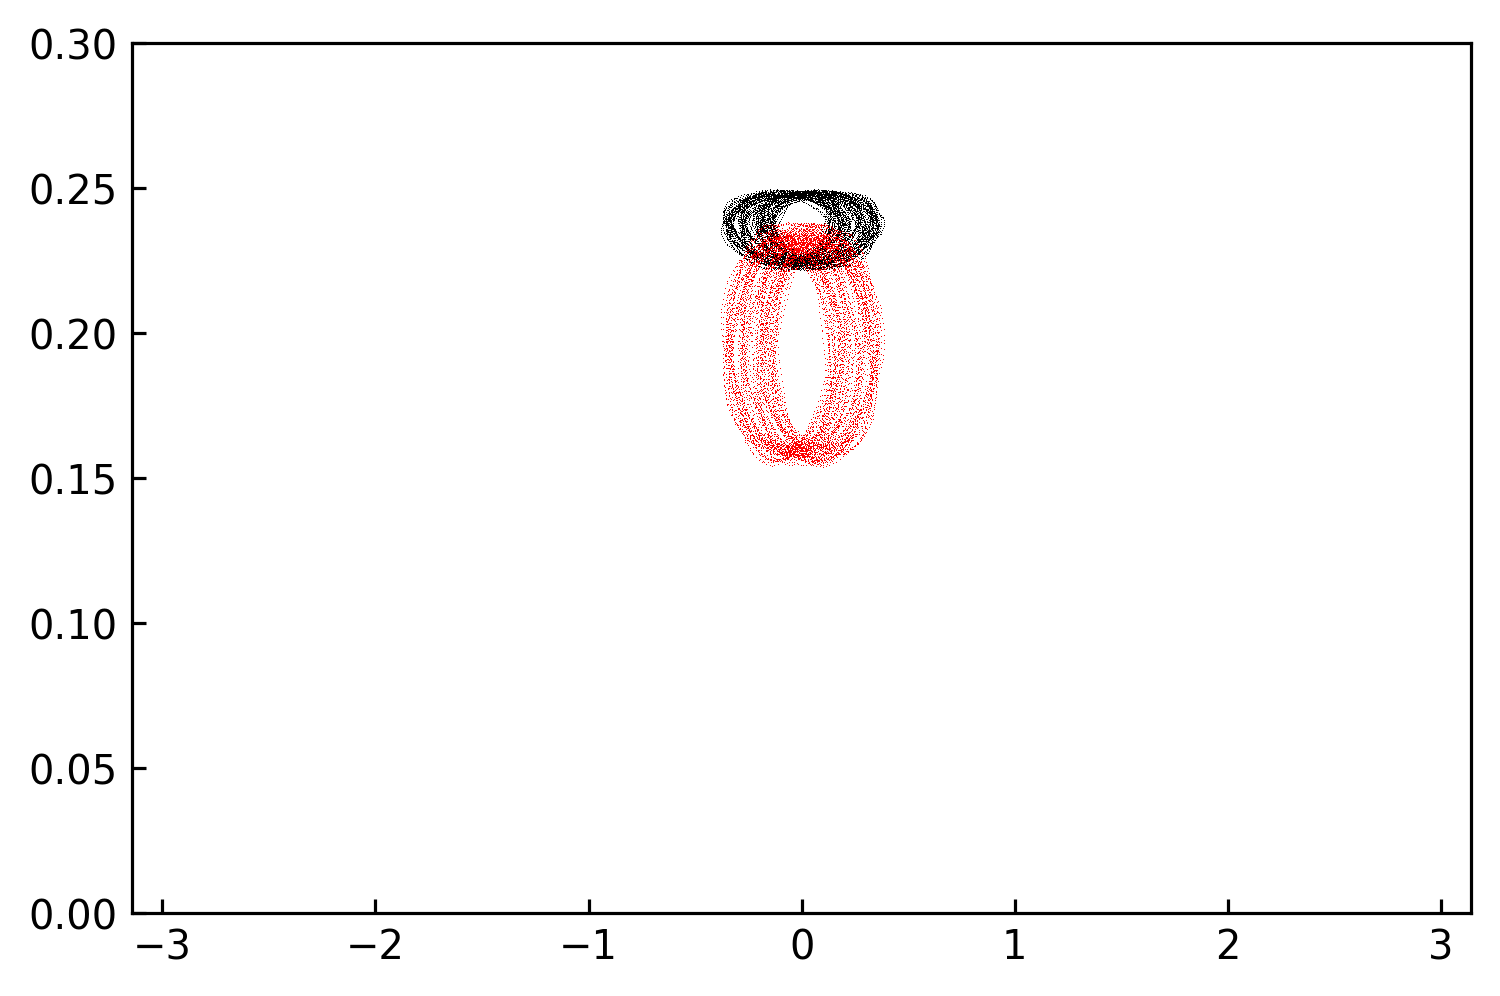

In [171]:
pomega1 = df['Omega1'] + df['omega1'] 
pomega2 = df['Omega2'] + df['omega2'] 
dpomega = pomega2 - pomega1


plot(dpomega,df['e1'],',k' )
plot(dpomega,df['e2'],',r' )
xlim(-pi,pi)
ylim(0,0.3)

(5000, 10000)

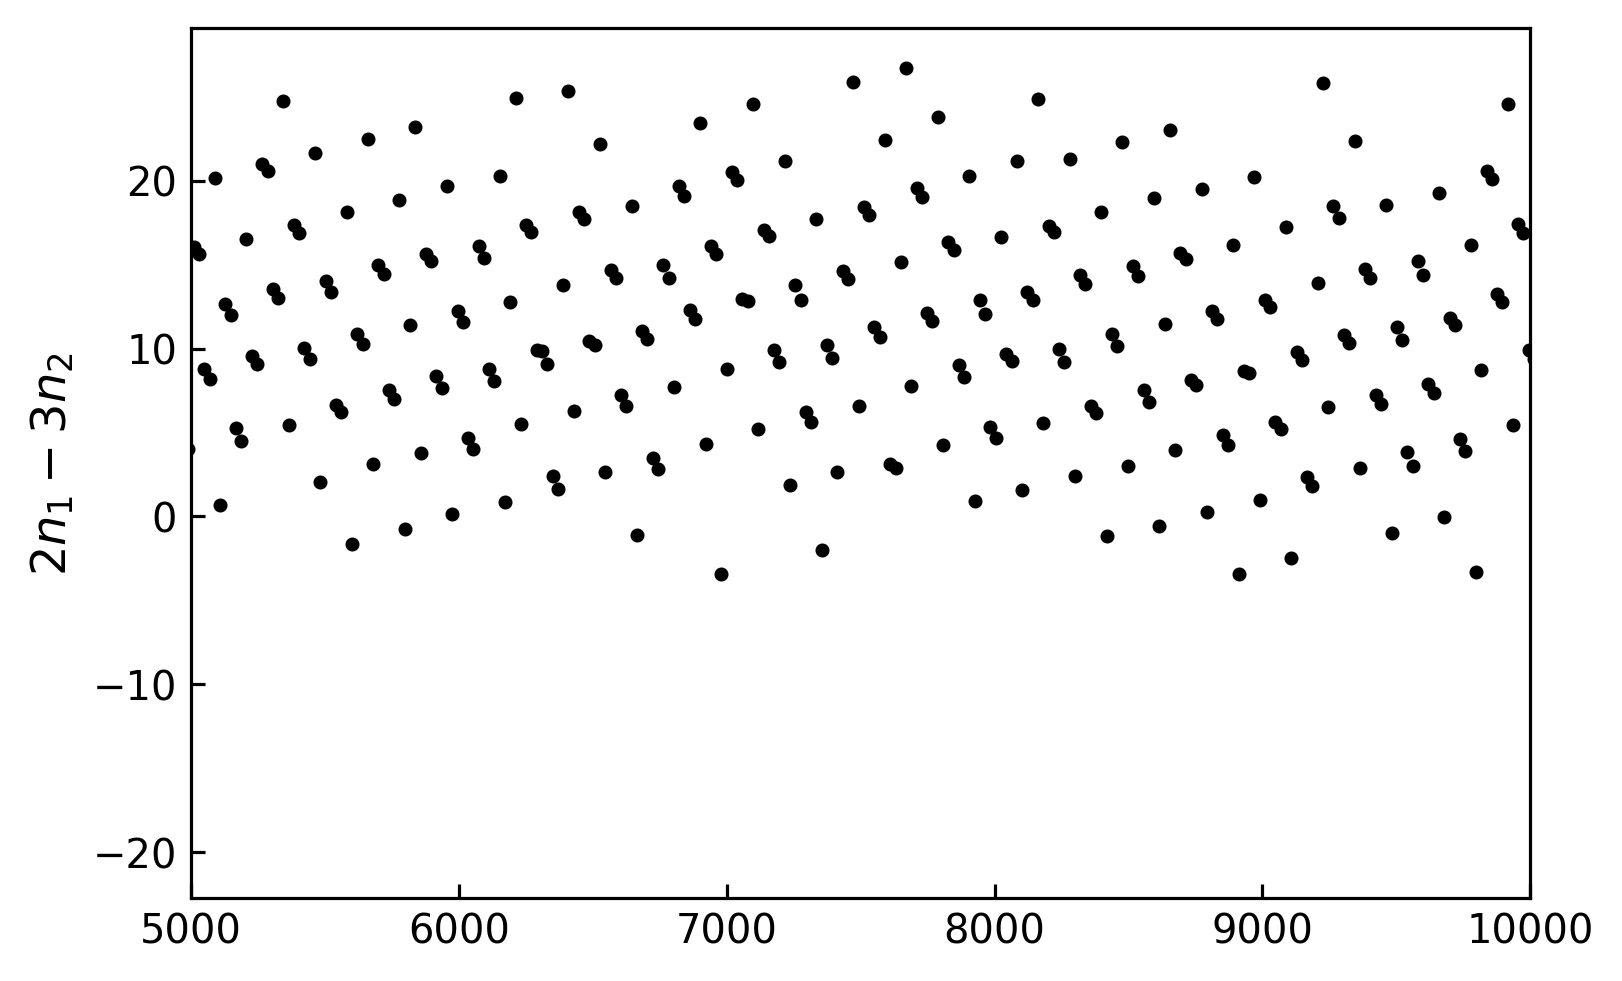

In [164]:
#plot(df['time'],2*df['n1'] - 3*df['n2'],'k.' )
ylabel('$2n_1 - 3 n_2 $')
plot(df['time'],2*df['lamb1'] - 3*df['lamb2'],'k.' )

xlim(5000,10000)

In [ ]:
plot(df['time'])

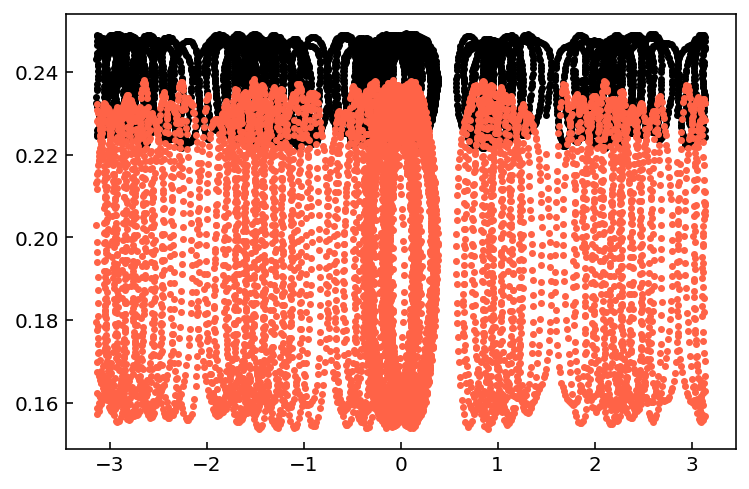

In [100]:
plot(df['dpomega'],df.e1,'.')
plot(df['dpomega'],df.e2,'.')

read table mills-photodyn-samples from load_table_cache.hdf
> /Users/petigura/Research/K2-19_TTV+RV/ktwo19/nbody.py(27)setupSimulation()
-> sim.add(m=m, P=P, e=e, omega=omega, Omega=Omega, inc=inc, T=T)
(Pdb) n
> /Users/petigura/Research/K2-19_TTV+RV/ktwo19/nbody.py(30)setupSimulation()
-> m = row.masse3 * c.M_earth / c.M_sun # Solar masses
(Pdb) 
> /Users/petigura/Research/K2-19_TTV+RV/ktwo19/nbody.py(31)setupSimulation()
-> P = row.per3
(Pdb) 
> /Users/petigura/Research/K2-19_TTV+RV/ktwo19/nbody.py(32)setupSimulation()
-> e = row.e3
(Pdb) 
> /Users/petigura/Research/K2-19_TTV+RV/ktwo19/nbody.py(33)setupSimulation()
-> omega = row.w3
(Pdb) 
> /Users/petigura/Research/K2-19_TTV+RV/ktwo19/nbody.py(34)setupSimulation()
-> Omega = row.Omegarad3
(Pdb) 
> /Users/petigura/Research/K2-19_TTV+RV/ktwo19/nbody.py(35)setupSimulation()
-> inc = row.incrad3
(Pdb) 
> /Users/petigura/Research/K2-19_TTV+RV/ktwo19/nbody.py(36)setupSimulation()
-> T = row.tp3 # Time of periastron
(Pdb) 
> /Users/petigur

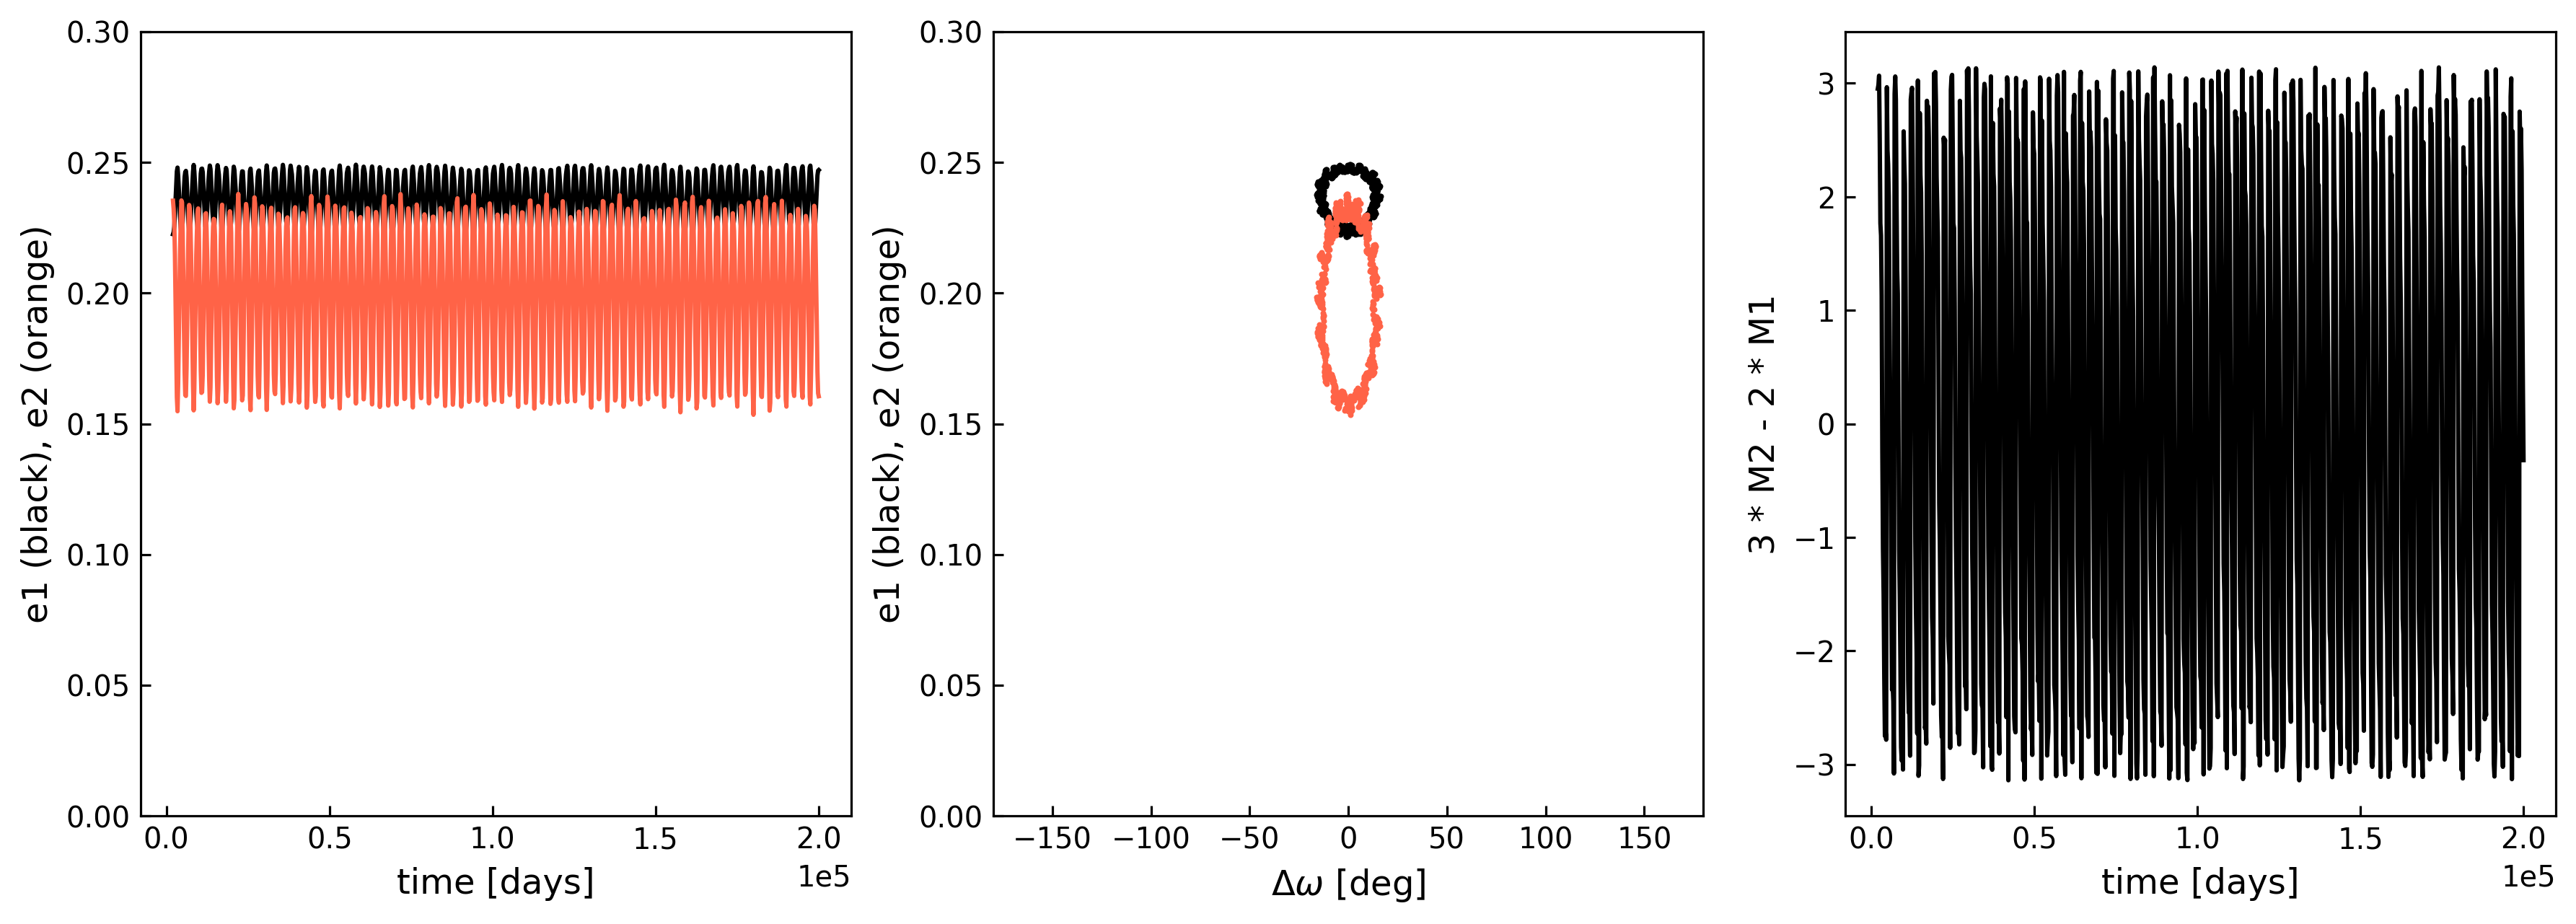

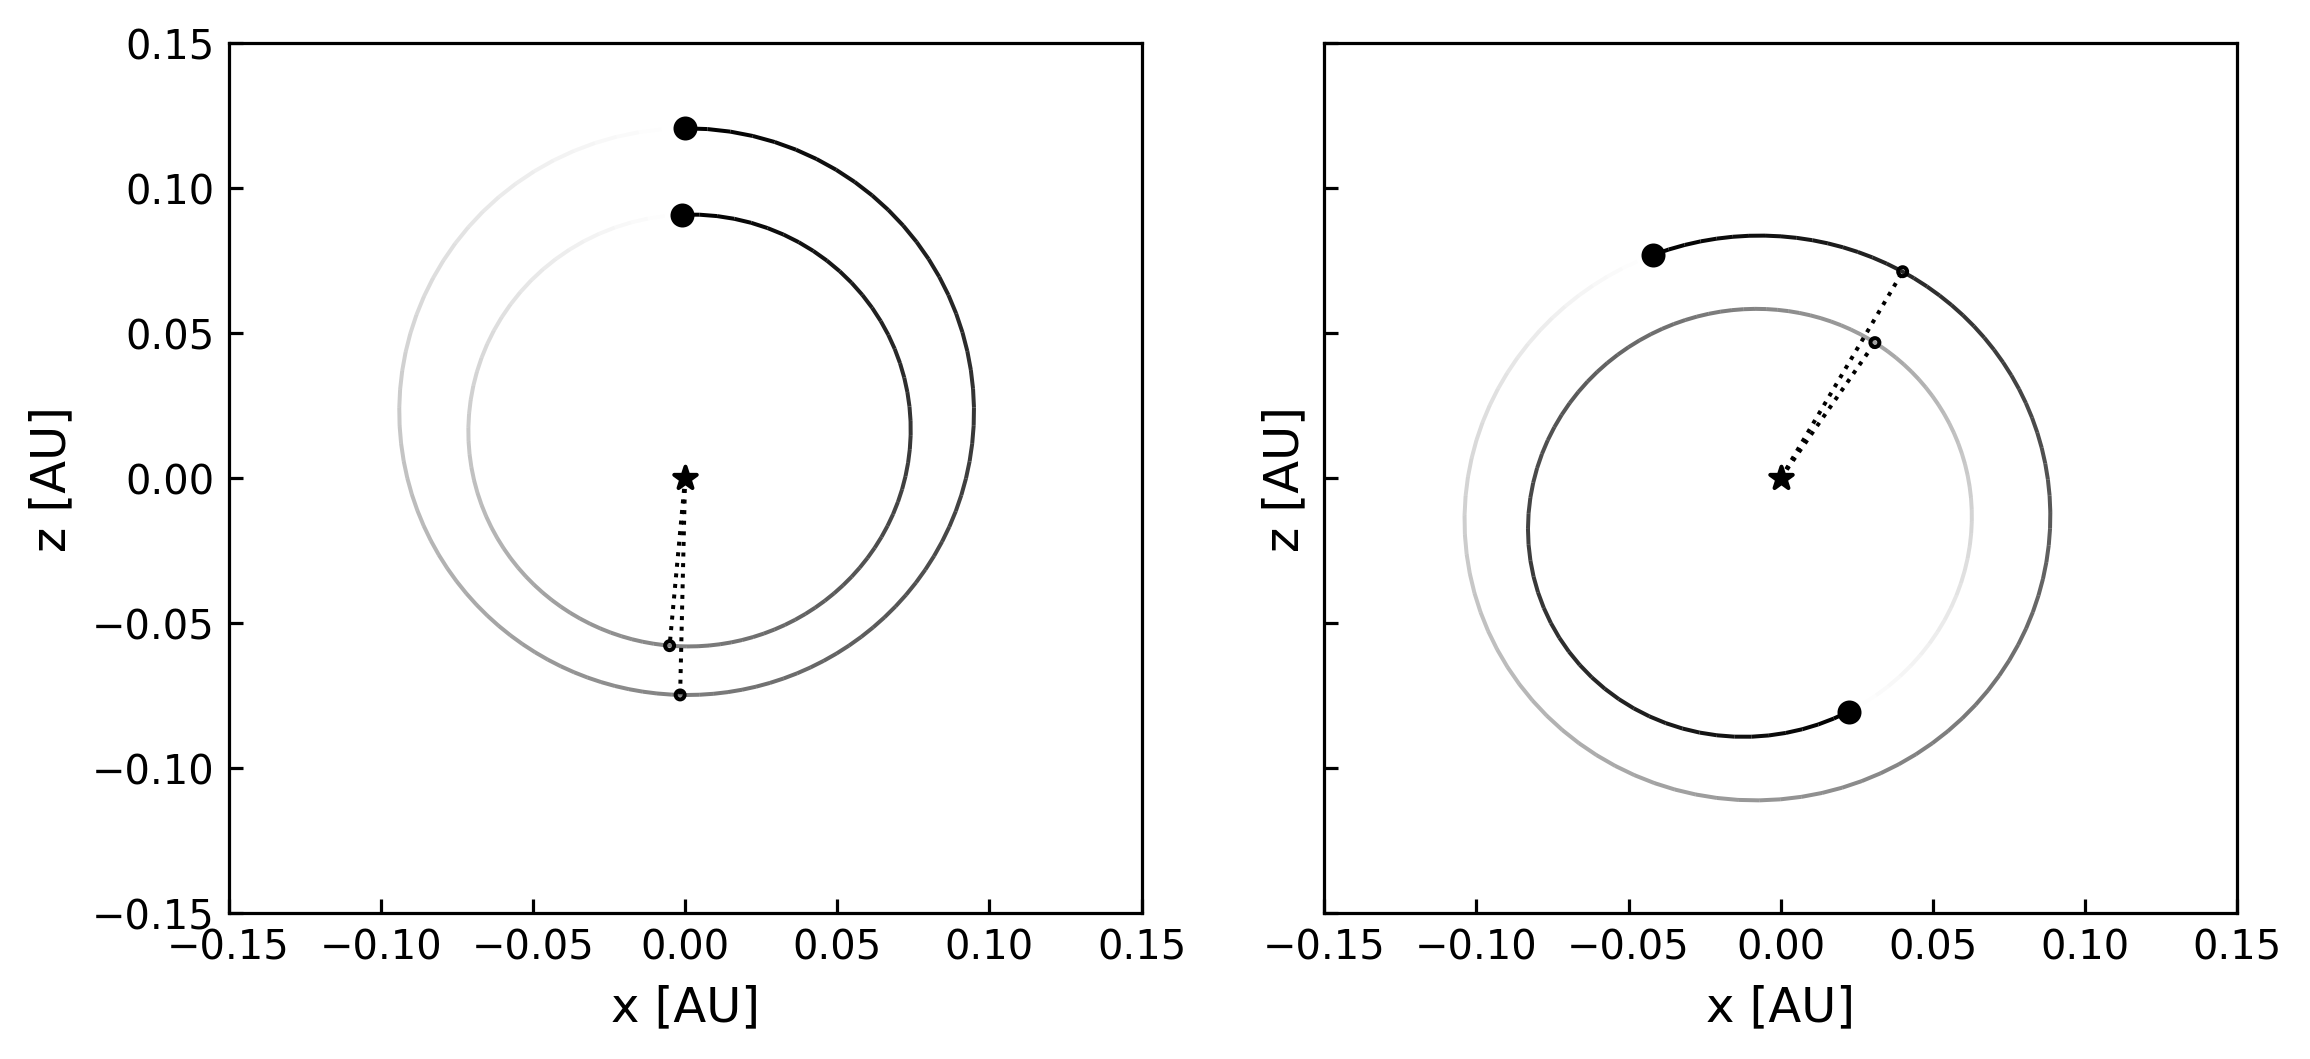

In [6]:
%reload_ext autoreload
%autoreload 2
%pylab inline
import ktwo19.io
df = ktwo19.io.load_table('photodyn-samples',cache=1)

Populating the interactive namespace from numpy and matplotlib
read table photodyn-samples from load_table_cache.hdf


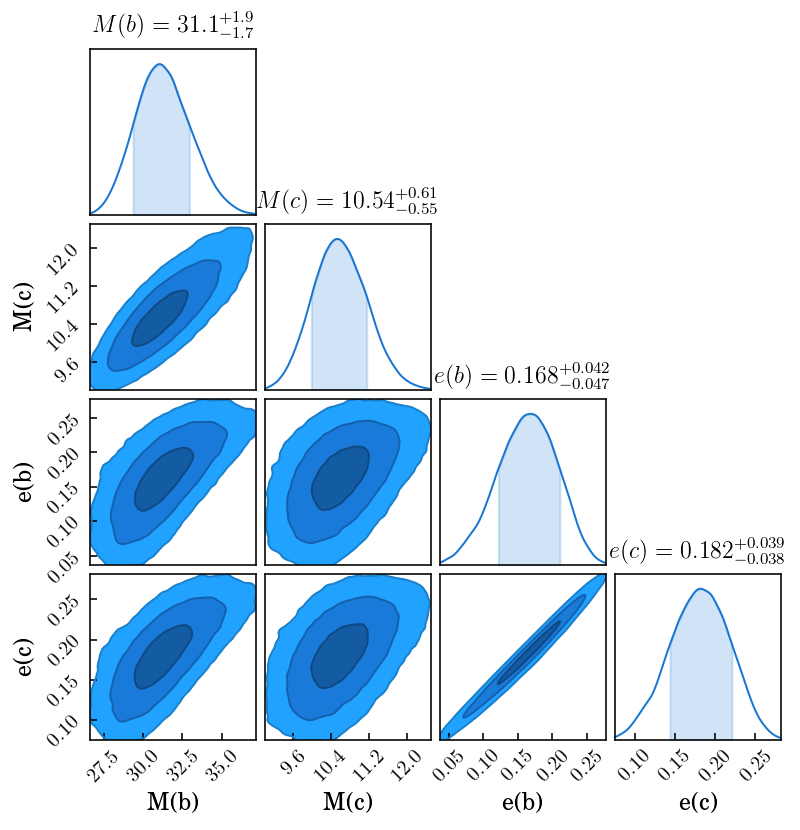

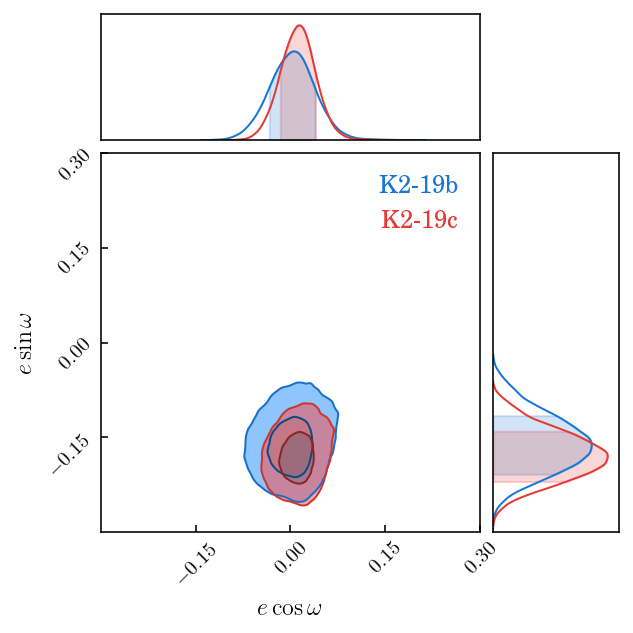

In [8]:
import corner
from chainconsumer import ChainConsumer


con = ChainConsumer()
parameters=["M(b)", "M(c)",'e(b)','e(c)']
con.add_chain(np.array(df['masse2 masse3 e2 e3'.split()]),parameters=parameters,name='K2-19b')
fig = con.plotter.plot()
fig.subplots_adjust(left=0.15, bottom=0.15)
fig.savefig('fig_corner-mass-ecc.pdf')
legend()

con = ChainConsumer()
parameters=["$e \cos \omega$", "$e \sin \omega$"]
con.add_chain(np.array(df['ecosw2 esinw2'.split()]),parameters=parameters,name='K2-19b')
con.add_chain(np.array(df['ecosw3 esinw3'.split()]),parameters=parameters,name='K2-19c')
fig = con.plotter.plot(extents=[(-0.3,0.3),(-0.3,0.3)],figsize=(4.5,4.5))
fig.subplots_adjust(left=0.15, bottom=0.15)
legend()
fig.savefig('fig_corner-ecc-omega.pdf')

